# Classification models

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
df = pd.read_csv("D:/VIT 2nd Sem/Project Work/Final work/data/student_performance_dataset_with_engineered_features.csv")
df.head()

,age,gender,recent_past_grades,attendance,attention_lectures,stress_level,sleep_hours,sleep_quality,motivation_score,social_support,...,room_sharing,sgpa,stress_sleep_ratio,motivation_stress_diff,screen_sleep_balance,rest_quality_score,mental_health_index,study_support_score,time_drain_score,room_disturbance_score
0,18,Other,6.7,75-85%,2,2,7.7,1,5,1,...,0,4.32,0.259740,3,1.103895,7.7,4,5,1.6,0
1,29,Other,9.4,Below 55%,4,2,5.8,5,3,1,...,1,5.87,0.344827,1,1.844824,29.0,2,10,3.0,3
2,24,Male,7.2,65-75%,5,3,8.1,1,4,5,...,0,4.90,0.370370,1,0.308642,8.1,6,7,7.2,0
3,21,Female,5.5,75-85%,1,4,4.7,4,3,2,...,1,4.00,0.851062,-1,1.212763,18.8,1,6,0.5,5
4,28,Other,8.5,75-85%,3,1,4.4,1,3,4,...,1,5.47,0.227272,2,0.999998,4.4,6,12,1.2,3


In [25]:
def categorize_sgpa(sgpa):
    if sgpa >= 9.0:
        return "Excellent"
    elif sgpa >= 8.0:
        return "Very Good"
    elif sgpa >= 7.0:
        return "Good"
    elif sgpa >= 6.0:
        return "Average"
    else:
        return "Poor"
    
df['sgpa_class'] = df['sgpa'].apply(categorize_sgpa)
df.head()

,age,gender,recent_past_grades,attendance,attention_lectures,stress_level,sleep_hours,sleep_quality,motivation_score,social_support,...,sgpa,stress_sleep_ratio,motivation_stress_diff,screen_sleep_balance,rest_quality_score,mental_health_index,study_support_score,time_drain_score,room_disturbance_score,sgpa_class
0,18,Other,6.7,75-85%,2,2,7.7,1,5,1,...,4.32,0.259740,3,1.103895,7.7,4,5,1.6,0,Poor
1,29,Other,9.4,Below 55%,4,2,5.8,5,3,1,...,5.87,0.344827,1,1.844824,29.0,2,10,3.0,3,Poor
2,24,Male,7.2,65-75%,5,3,8.1,1,4,5,...,4.90,0.370370,1,0.308642,8.1,6,7,7.2,0,Poor
3,21,Female,5.5,75-85%,1,4,4.7,4,3,2,...,4.00,0.851062,-1,1.212763,18.8,1,6,0.5,5,Poor
4,28,Other,8.5,75-85%,3,1,4.4,1,3,4,...,5.47,0.227272,2,0.999998,4.4,6,12,1.2,3,Poor


In [26]:
X = df.drop(columns=["sgpa", "sgpa_class"])

In [27]:
le = LabelEncoder()
y = le.fit_transform(df["sgpa_class"])

In [28]:
categorical = ["gender", "attendance"]
numerical = [col for col in X.columns if col not in categorical]

In [29]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(drop="first"), categorical)
])

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [30]:
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "MLP": MLPClassifier(max_iter=1000)
}

results = {}
y_pred_dict = {}

In [31]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_dict[name] = y_pred

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted")
    }

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:19:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1894
[LightGBM] [Info] Number of data points in the train set: 53135, number of used features: 31
[LightGBM] [Info] Start training from score -2.004047
[LightGBM] [Info] Start training from score -6.646485
[LightGBM] [Info] Start training from score -3.129976
[LightGBM] [Info] Start training from score -0.261095
[LightGBM] [Info] Start training from score -2.996015


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


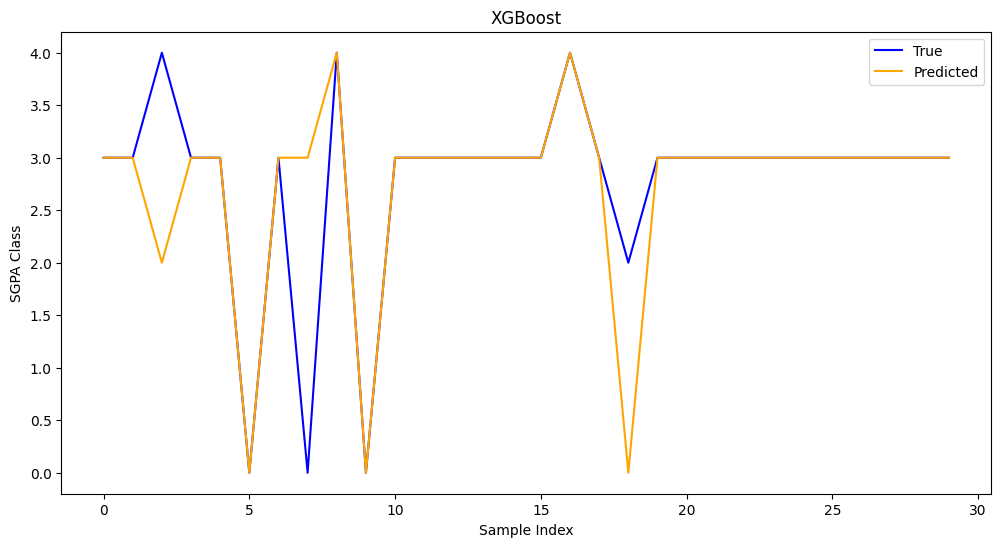

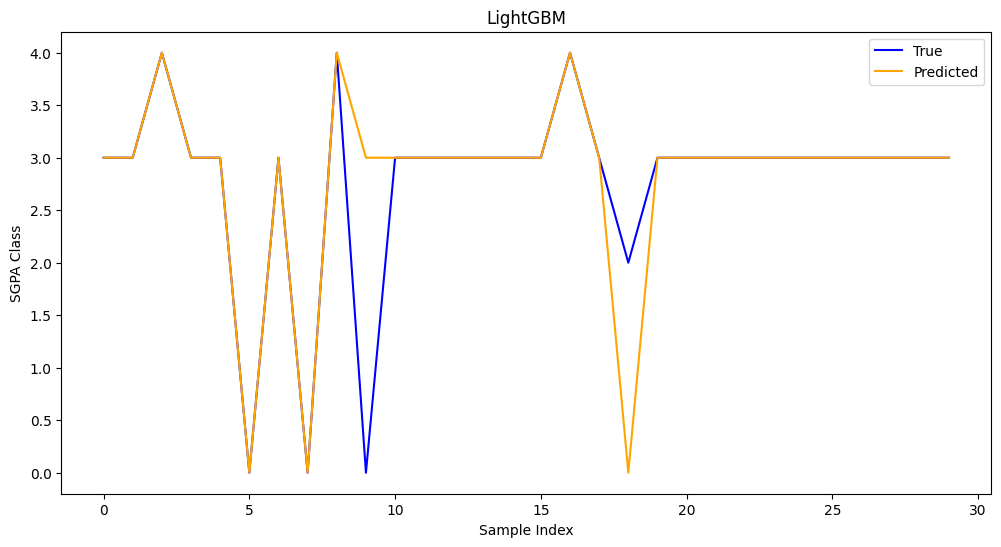

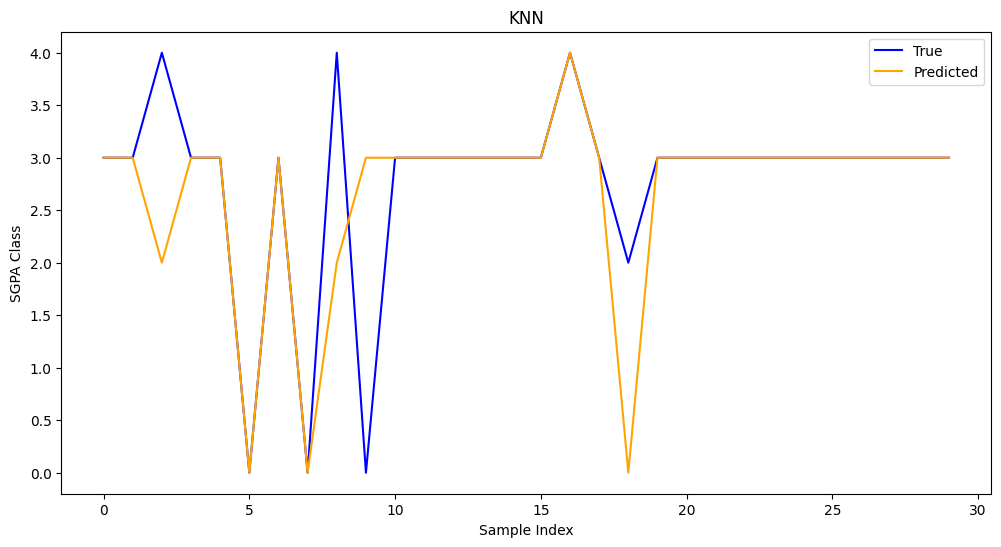

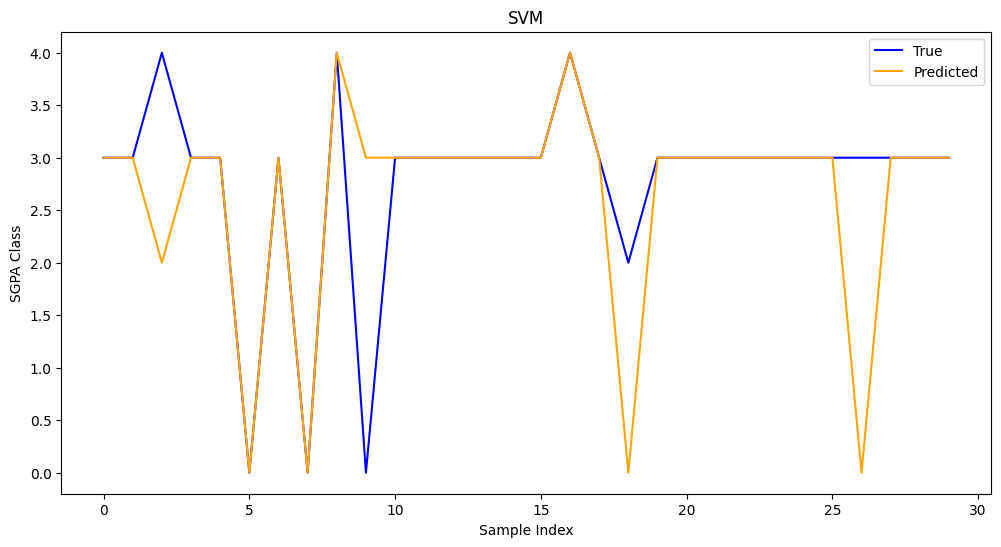

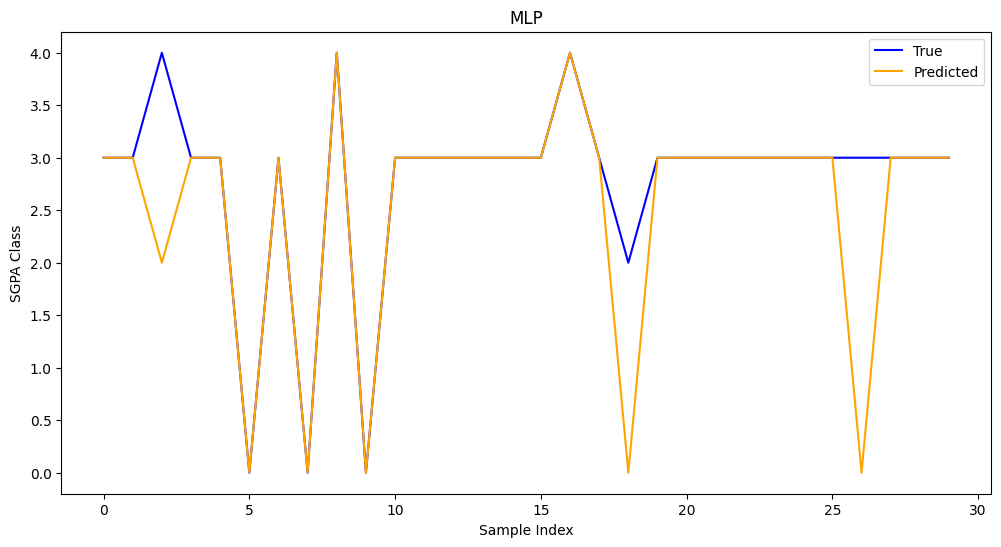

In [32]:
for name, preds in y_pred_dict.items():
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:30], label="True", color="blue")
    plt.plot(preds[:30], label="Predicted", color="orange")
    plt.title(f"{name}")
    plt.xlabel("Sample Index")
    plt.ylabel("SGPA Class")
    plt.legend()
    plt.show()

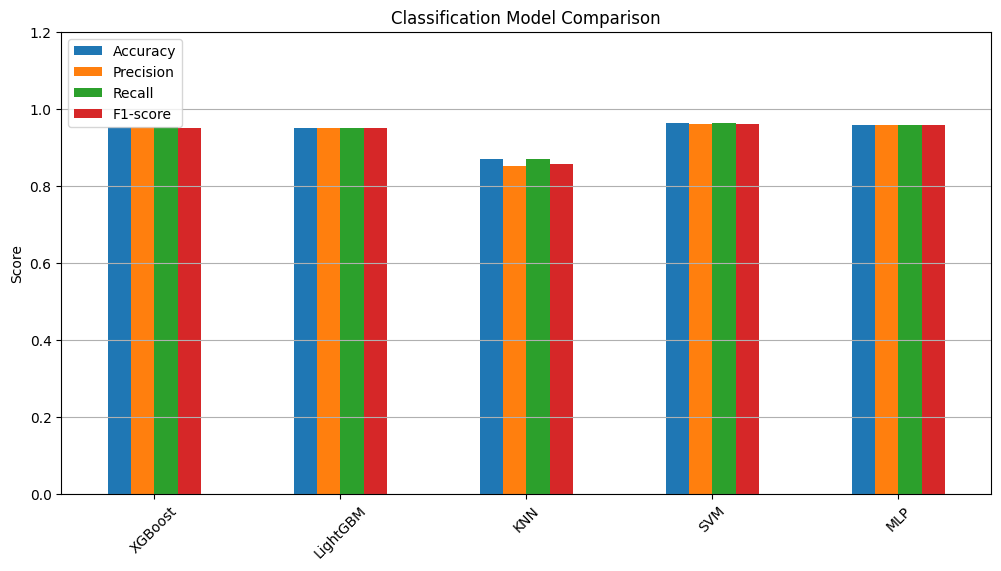

In [33]:
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Classification Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.2)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [34]:
def highlight_best_classification(s):
    is_best = s == s.max()
    return ['background-color: blue' if v else '' for v in is_best]

styled_df = metrics_df.style.apply(highlight_best_classification, axis=0).format("{:.2%}")
display(styled_df)

,Accuracy,Precision,Recall,F1-score
XGBoost,95.28%,95.19%,95.28%,95.16%
LightGBM,95.13%,95.00%,95.13%,95.02%
KNN,86.92%,85.24%,86.92%,85.58%
SVM,96.24%,96.01%,96.24%,96.11%
MLP,95.90%,95.94%,95.90%,95.91%


In [35]:
for name, preds in y_pred_dict.items():
    report = classification_report(y_test, preds, zero_division=1, target_names=['Average', 'Excellent', 'Good', 'Poor', 'Very Good'])
    print(f"\n{name} Classification Report:\n")
    print(report)


XGBoost Classification Report:

              precision    recall  f1-score   support

     Average       0.85      0.85      0.85      1826
   Excellent       1.00      0.36      0.53        28
        Good       0.87      0.71      0.78       574
        Poor       0.97      0.99      0.98     10167
   Very Good       0.94      0.94      0.94       689

    accuracy                           0.95     13284
   macro avg       0.93      0.77      0.82     13284
weighted avg       0.95      0.95      0.95     13284


LightGBM Classification Report:

              precision    recall  f1-score   support

     Average       0.85      0.84      0.84      1826
   Excellent       0.50      0.46      0.48        28
        Good       0.87      0.70      0.78       574
        Poor       0.97      0.99      0.98     10167
   Very Good       0.95      0.93      0.94       689

    accuracy                           0.95     13284
   macro avg       0.83      0.78      0.80     13284
weighted a